Sampling of multivariate random variables

1. Substantiation of chosen sampling.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from distfit import distfit
from tabulate import tabulate

import warnings
warnings.filterwarnings(action='ignore')

Let's prepare the data

In [11]:
data = pd.read_csv('../dataset/typhoon_data.csv')

# Drop specific columns
columns_to_drop = ['International number ID', 'Indicator of landfall or passage']
data = data.drop(columns_to_drop, axis=1)

# Drop rows with missing values
data = data.dropna()

# Drop the first column (it is unnamed and holds index)
data = data.iloc[:, 2:]

# print(data.columns)
# print("Number of columns:", data.shape[1])

# Lets abbreviate
abbreviation = ['month', 'day', 'hour', 'grade', 'latitude_center','longitude_center','central_presure', 'max_sust_wind_speed', 'dir_of_longeast_rad_of_50kt_or_greater', 'longeast_rad_of_50kt_winds_or_greater', 'shortest_rad_of_50kt_winds_or_greater', 'dir_of_longeast_rad_of_30kt_winds_or_greater', 'longest_rad_of_30kt_winds_or_greater', 'shortest_rad_of_30kt_winds_or_greater']
data.columns = abbreviation

# Drop rows with missing values
data.dropna()

print(data.columns)
print("Number of columns:", data.shape[1])

# Let's see unique values of our non numeric columns
print(data['dir_of_longeast_rad_of_30kt_winds_or_greater'].unique())
print(data['grade'].unique())
print(data['dir_of_longeast_rad_of_50kt_or_greater'].unique())

data

Index(['month', 'day', 'hour', 'grade', 'latitude_center', 'longitude_center',
       'central_presure', 'max_sust_wind_speed',
       'dir_of_longeast_rad_of_50kt_or_greater',
       'longeast_rad_of_50kt_winds_or_greater',
       'shortest_rad_of_50kt_winds_or_greater',
       'dir_of_longeast_rad_of_30kt_winds_or_greater',
       'longest_rad_of_30kt_winds_or_greater',
       'shortest_rad_of_30kt_winds_or_greater'],
      dtype='object')
Number of columns: 14
['(symmetric circle)' 'Northeast' 'South' 'East' 'Southeast' 'West'
 'North' 'Northwest' 'No direction' 'Southwest']
['Severe Tropical Storm' 'Tropical Storm' 'Typhoon'
 'Just entering into the responsible area of RSMC Tokyo-Typhoon Center']
['No direction' '(symmetric circle)' 'Northeast' 'Southeast' 'East'
 'North' 'West' 'Northwest' 'South' 'Southwest']


month  day  hour                  grade  latitude_center  \
25272      3   28     0  Severe Tropical Storm               56   
25273      3   28     6  Severe Tropical Storm               61   
25274      3   28    12  Severe Tropical Storm               66   
25275      3   28    18         Tropical Storm               70   
25276      3   29     0         Tropical Storm               73   
...      ...  ...   ...                    ...              ...   
68609     11   14     0         Tropical Storm              238   
68619     12   11    12         Tropical Storm              182   
68620     12   11    18         Tropical Storm              190   
68621     12   12     0         Tropical Storm              200   
68622     12   12     6         Tropical Storm              204   

       longitude_center  central_presure  max_sust_wind_speed  \
25272              1588              990                 50.0   
25273              1582              996                 50.0   
25274              1575             1000                 50.0   
25275              1568             1002                 45.0   
25276              1560             1002                 45.0   
...                 ...              ...                  ...   
68609              1655             1004                 35.0   
68619              1270             1000                 35.0   
68620              1281              998                 40.0   
68621              1293              998                 40.0   
68622              1310             1002                 35.0   

      dir_of_longeast_rad_of_50kt_or_greater  \
25272                           No direction   
25273                           No direction   
25274                           No direction   
25275                           No direction   
25276                           No direction   
...                                      ...   
68609                           No direction   
68619                           No direction   
68620                           No direction   
68621                           No direction   
68622                           No direction   

       longeast_rad_of_50kt_winds_or_greater  \
25272                                    0.0   
25273                                    0.0   
25274                                    0.0   
25275                                    0.0   
25276                                    0.0   
...                                      ...   
68609                                    0.0   
68619                                    0.0   
68620                                    0.0   
68621                                    0.0   
68622                                    0.0   

       shortest_rad_of_50kt_winds_or_greater  \
25272                                    0.0   
25273                                    0.0   
25274                                    0.0   
25275                                    0.0   
25276                                    0.0   
...                                      ...   
68609                                    0.0   
68619                                    0.0   
68620                                    0.0   
68621                                    0.0   
68622                                    0.0   

      dir_of_longeast_rad_of_30kt_winds_or_greater  \
25272                           (symmetric circle)   
25273                           (symmetric circle)   
25274                           (symmetric circle)   
25275                           (symmetric circle)   
25276                           (symmetric circle)   
...                                            ...   
68609                                    Northeast   
68619                           (symmetric circle)   
68620                           (symmetric circle)   
68621                                        North   
68622                                        North   

       longest_rad_of_30kt_winds_or_great

Let's tokenize the non numeric values

In [13]:
from sklearn.preprocessing import LabelEncoder

# Copy data to sample
sample = data.copy()

# Create LabelEncoder object
le = LabelEncoder()

# Define columns to encode
cols_to_encode = ['dir_of_longeast_rad_of_30kt_winds_or_greater', 'grade', 'dir_of_longeast_rad_of_50kt_or_greater']

# Loop through columns and encode
for col in cols_to_encode:
    sample[col] = le.fit_transform(sample[col])

sample

month  day  hour  grade  latitude_center  longitude_center  \
25272      3   28     0      1               56              1588   
25273      3   28     6      1               61              1582   
25274      3   28    12      1               66              1575   
25275      3   28    18      2               70              1568   
25276      3   29     0      2               73              1560   
...      ...  ...   ...    ...              ...               ...   
68609     11   14     0      2              238              1655   
68619     12   11    12      2              182              1270   
68620     12   11    18      2              190              1281   
68621     12   12     0      2              200              1293   
68622     12   12     6      2              204              1310   

       central_presure  max_sust_wind_speed  \
25272              990                 50.0   
25273              996                 50.0   
25274             1000                 50.0   
25275             1002                 45.0   
25276             1002                 45.0   
...                ...                  ...   
68609             1004                 35.0   
68619             1000                 35.0   
68620              998                 40.0   
68621              998                 40.0   
68622             1002                 35.0   

       dir_of_longeast_rad_of_50kt_or_greater  \
25272                                       2   
25273                                       2   
25274                                       2   
25275                                       2   
25276                                       2   
...                                       ...   
68609                                       2   
68619                                       2   
68620                                       2   
68621                                       2   
68622                                       2   

       longeast_rad_of_50kt_winds_or_greater  \
25272                                    0.0   
25273                                    0.0   
25274                                    0.0   
25275                                    0.0   
25276                                    0.0   
...                                      ...   
68609                                    0.0   
68619                                    0.0   
68620                                    0.0   
68621                                    0.0   
68622                                    0.0   

       shortest_rad_of_50kt_winds_or_greater  \
25272                                    0.0   
25273                                    0.0   
25274                                    0.0   
25275                                    0.0   
25276                                    0.0   
...                                      ...   
68609                                    0.0   
68619                                    0.0   
68620                                    0.0   
68621                                    0.0   
68622                                    0.0   

       dir_of_longeast_rad_of_30kt_winds_or_greater  \
25272                                             0   
25273                                             0   
25274                                             0   
25275                                             0   
25276                                             0   
...                                             ...   
68609                                             4   
68619                                             0   
68620                                             0   
68621                                             3   
68622                                             3   

       longest_rad_of_30kt_winds_or_greater  \
25272                                 125.0   
25273                                 125.0   
25274                                 125.0   
25275                

In [14]:
def plotEstimation(dataset, column_names):
    figure, ax = plt.subplots(7, 2, figsize=(15, 15))
    sns.set_theme(style='whitegrid', palette="viridis")

    # Plot histograms or kernel density estimates for each column
    for i, column_name in enumerate(column_names):
        column_data = dataset[column_name]
        sns.histplot(column_data, kde=True, ax=ax.flatten()[i], stat='density')
        ax.flatten()[i].set_xlabel(column_name)

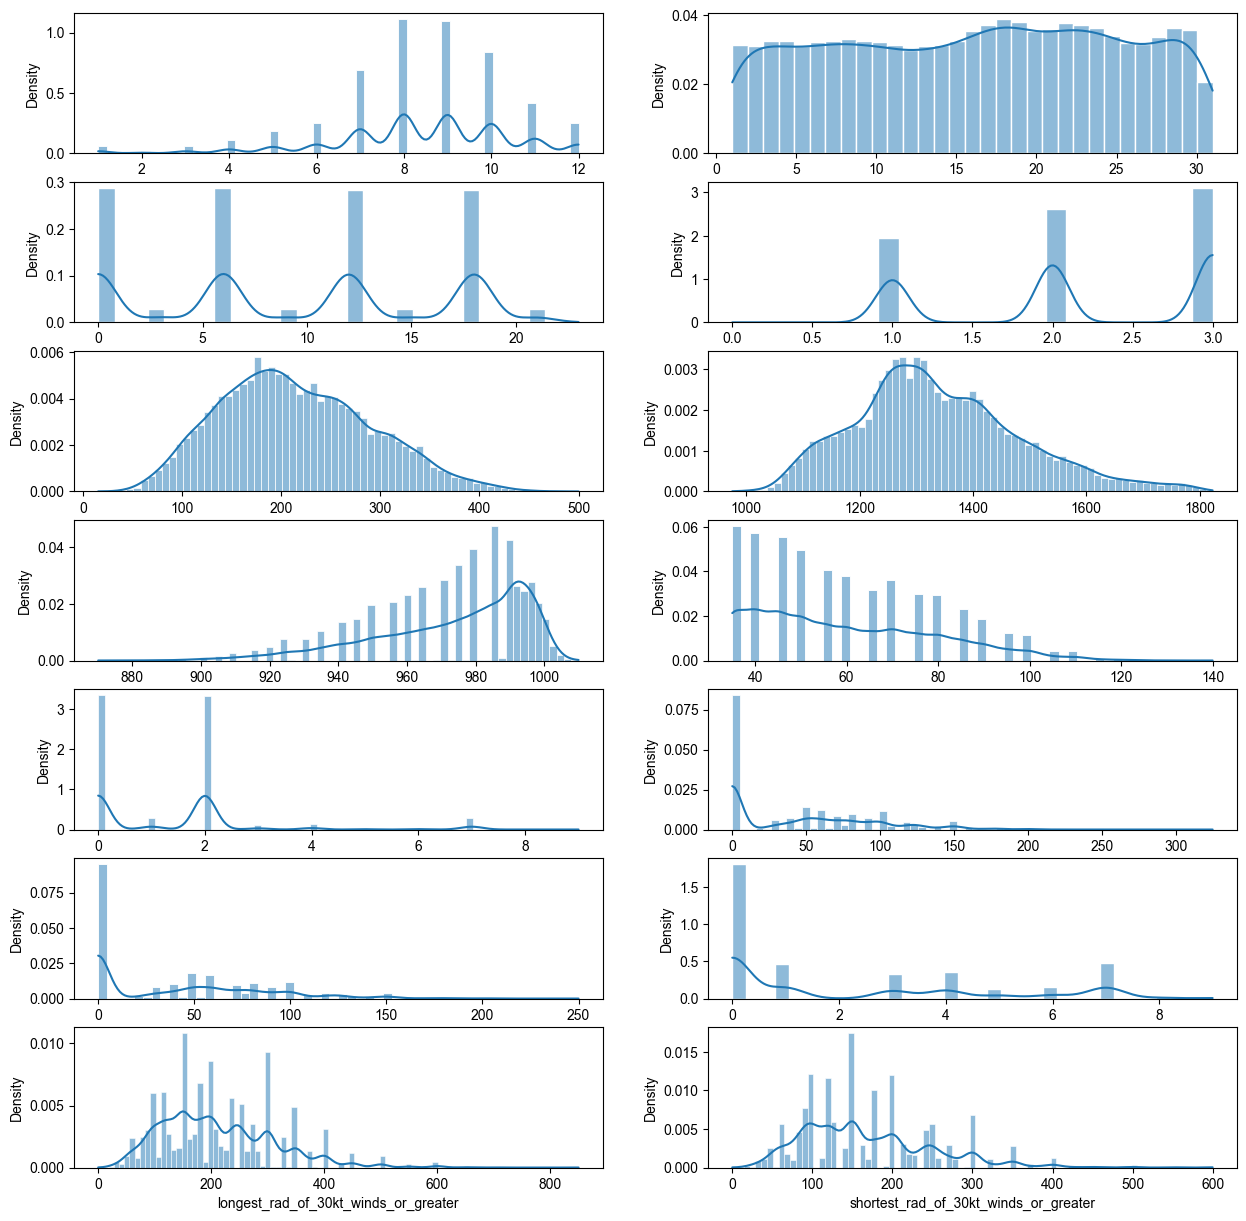

In [15]:
# Select the columns of interest
column_names = ['month', 'day', 'hour', 'grade', 'latitude_center', 'longitude_center',
                    'central_presure', 'max_sust_wind_speed',
                    'dir_of_longeast_rad_of_50kt_or_greater',
                    'longeast_rad_of_50kt_winds_or_greater',
                    'shortest_rad_of_50kt_winds_or_greater',
                    'dir_of_longeast_rad_of_30kt_winds_or_greater',
                    'longest_rad_of_30kt_winds_or_greater',
                    'shortest_rad_of_30kt_winds_or_greater']


plotEstimation(sample, column_names)

Let's visualize the relationship beteen our variables/columns/features

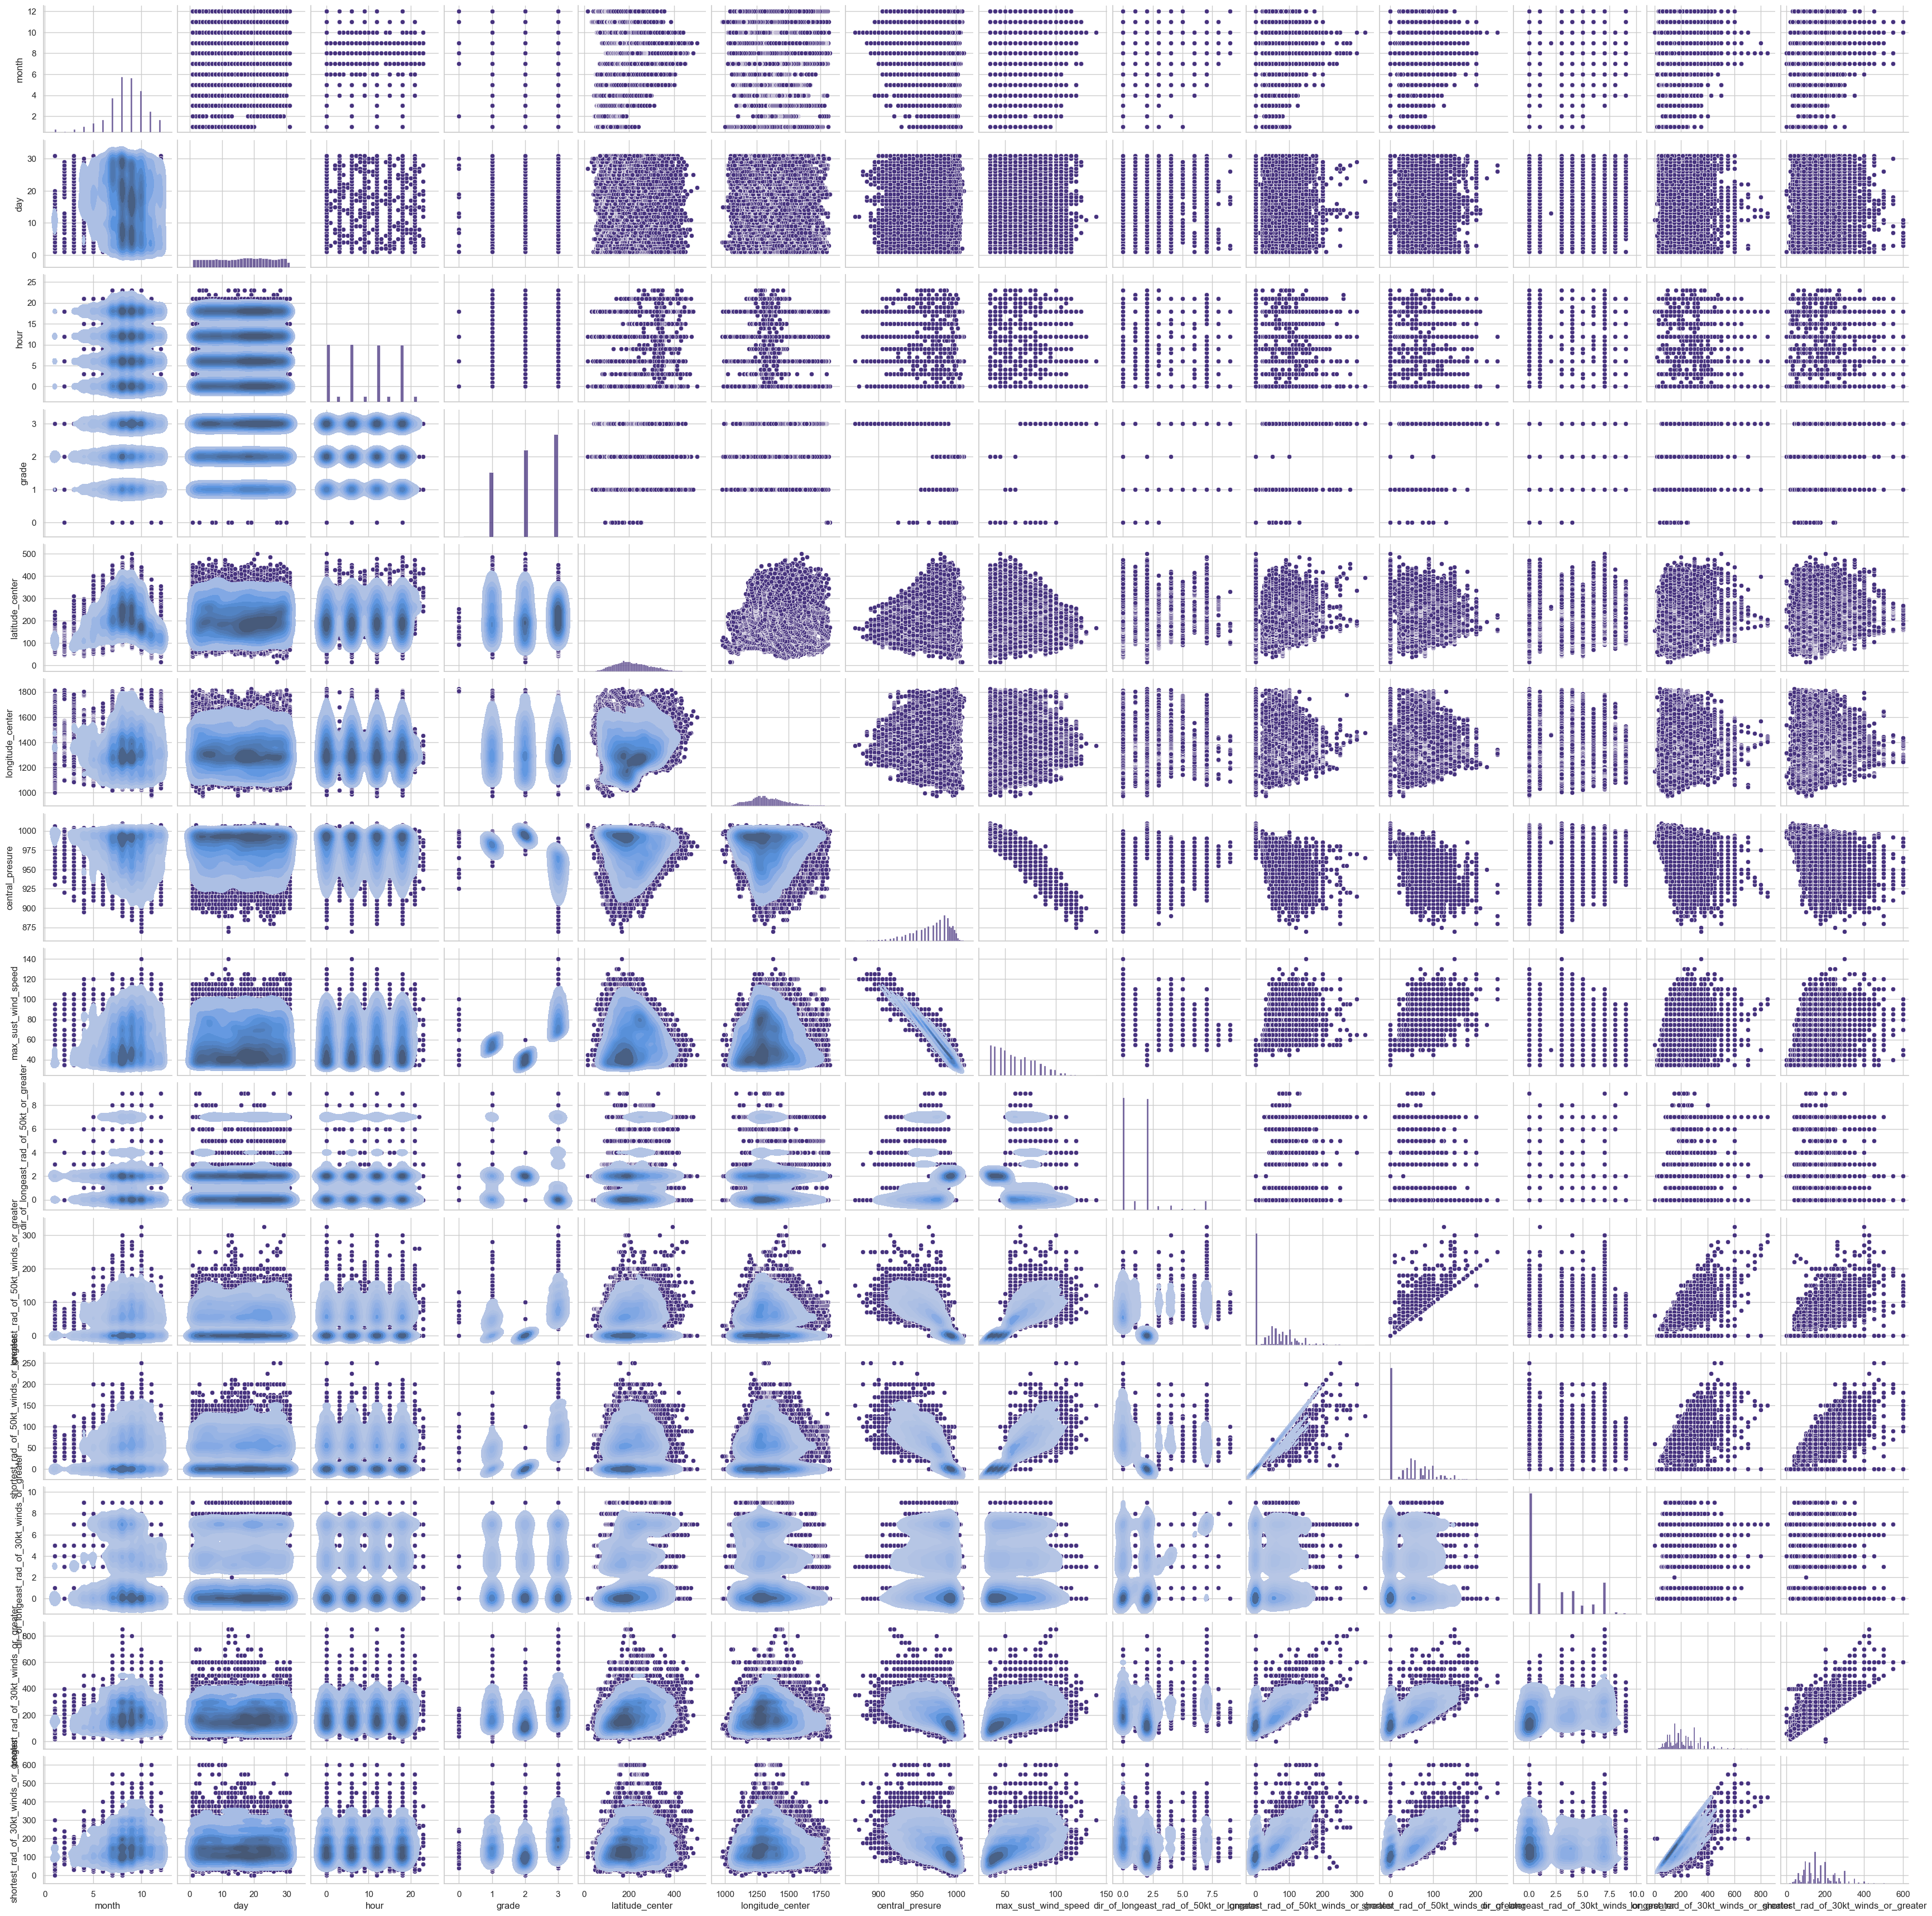

In [16]:
# Create a pairplot
# sns.pairplot(sample[column_names])

sns.set_theme(style='whitegrid', palette="viridis")
ax = sns.pairplot(sample, diag_kind='hist')
ax.map_lower(sns.kdeplot, fill=True)
plt.show()

LLet's try to estimation of pair correlation coefficients, their confidence intervals and significance levels.

In [17]:
figure, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.set_theme(style='whitegrid', palette='viridis')

corr_matrix = sample.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, ax=ax, vmax=1, fmt='.5g', linewidths=.5)

print(corr_matrix)
plt.title('Correlation')
plt.show()

                                                 month       day      hour  \
month                                         1.000000 -0.072737 -0.006859   
day                                          -0.072737  1.000000 -0.001167   
hour                                         -0.006859 -0.001167  1.000000   
grade                                         0.057539  0.005769  0.009488   
latitude_center                              -0.020020  0.003941  0.045059   
longitude_center                             -0.014144 -0.023897 -0.006721   
central_presure                              -0.090728 -0.007455 -0.020730   
max_sust_wind_speed                           0.103817  0.010953  0.021412   
dir_of_longeast_rad_of_50kt_or_greater       -0.064517 -0.008784  0.007370   
longeast_rad_of_50kt_winds_or_greater         0.103645  0.022057  0.021224   
shortest_rad_of_50kt_winds_or_greater         0.120668  0.028571  0.017912   
dir_of_longeast_rad_of_30kt_winds_or_greater -0.054154  0.001593

Ok, let's start by checking the variance inflation factor for each of our predictor variable

In [18]:
# Import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

# Create a dataframe with only the predictor variables
X = sample[['month', 'day', 'hour', 'latitude_center', 'longitude_center',
                    'max_sust_wind_speed',
                    'dir_of_longeast_rad_of_50kt_or_greater',
                    'longeast_rad_of_50kt_winds_or_greater',
                    'shortest_rad_of_50kt_winds_or_greater',
                    'dir_of_longeast_rad_of_30kt_winds_or_greater',
                    'longest_rad_of_30kt_winds_or_greater',
                    'shortest_rad_of_30kt_winds_or_greater']]

# Compute the VIF for each predictor variable
vif = pd.DataFrame()

# Create a list of tuples to hold the variable name and VIF value
vif_data = []
for i in range(len(X.columns)):
    vif = variance_inflation_factor(X.values, i)
    vif_data.append((X.columns[i], round(vif, 2)))

# Print the VIF values in a table
print(tabulate(vif_data, headers=['Variable', 'VIF'], tablefmt='psql'))


+----------------------------------------------+-------+
| Variable                                     |   VIF |
|----------------------------------------------+-------|
| month                                        | 15.68 |
| day                                          |  4.24 |
| hour                                         |  2.84 |
| latitude_center                              | 10.2  |
| longitude_center                             | 38    |
| max_sust_wind_speed                          | 33.26 |
| dir_of_longeast_rad_of_50kt_or_greater       |  3.32 |
| longeast_rad_of_50kt_winds_or_greater        | 36.89 |
| shortest_rad_of_50kt_winds_or_greater        | 43.75 |
| dir_of_longeast_rad_of_30kt_winds_or_greater |  2.92 |
| longest_rad_of_30kt_winds_or_greater         | 31.41 |
| shortest_rad_of_30kt_winds_or_greater        | 30.52 |
+----------------------------------------------+-------+


Let's check out the coefficent correlation between our predictor variable and target

In [19]:
import pandas as pd
from tabulate import tabulate

# Create correlation matrix
corr_matrix = sample.corr()

# Sort correlations in descending order
corr_cp = corr_matrix["central_presure"].sort_values(ascending=True)

corr_cp = corr_cp.drop('central_presure')  # Remove central pressure from the list
corr_cp = corr_cp.drop('grade')  # Remove central pressure from the list



# Print table with predictors and correlation to central pressure
table = []
for i in range(len(corr_cp)):
    table.append([corr_cp.index[i], corr_cp[i]])
print(tabulate(table, headers=["Predictor", "Correlation to Central Pressure"], floatfmt=".3f", numalign="right"))


Predictor                                       Correlation to Central Pressure
--------------------------------------------  ---------------------------------
max_sust_wind_speed                                                      -0.968
shortest_rad_of_50kt_winds_or_greater                                    -0.830
longeast_rad_of_50kt_winds_or_greater                                    -0.806
shortest_rad_of_30kt_winds_or_greater                                    -0.542
longest_rad_of_30kt_winds_or_greater                                     -0.499
month                                                                    -0.091
dir_of_longeast_rad_of_30kt_winds_or_greater                             -0.078
latitude_center                                                          -0.043
hour                                                                     -0.021
longitude_center                                                         -0.020
day                                     

In [20]:
import pandas as pd
from tabulate import tabulate

# Create correlation matrix
corr_matrix = sample.corr()

# Sort correlations in descending order
corr_cp = corr_matrix["grade"].sort_values(ascending=True)

corr_cp = corr_cp.drop('central_presure')  # Remove central pressure from the list
corr_cp = corr_cp.drop('grade')  # Remove central pressure from the list



# Print table with predictors and correlation to central pressure
table = []
for i in range(len(corr_cp)):
    table.append([corr_cp.index[i], corr_cp[i]])
print(tabulate(table, headers=["Predictor", "Correlation to Central Pressure"], floatfmt=".3f", numalign="right"))


Predictor                                       Correlation to Central Pressure
--------------------------------------------  ---------------------------------
dir_of_longeast_rad_of_50kt_or_greater                                   -0.123
latitude_center                                                          -0.023
longitude_center                                                          0.004
day                                                                       0.006
hour                                                                      0.009
dir_of_longeast_rad_of_30kt_winds_or_greater                              0.026
month                                                                     0.058
longest_rad_of_30kt_winds_or_greater                                      0.246
shortest_rad_of_30kt_winds_or_greater                                     0.287
longeast_rad_of_50kt_winds_or_greater                                     0.541
shortest_rad_of_50kt_winds_or_greater   

It's a good idea to scale the predictor variables before fitting the multiple regression model. Scaler can help in normalizing or standardizing the features, which can improve the performance of some machine learning algorithms

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Predictor variables for central pressure
X_central = sample[['max_sust_wind_speed', 'shortest_rad_of_50kt_winds_or_greater', 
                   'longeast_rad_of_50kt_winds_or_greater', 'shortest_rad_of_30kt_winds_or_greater',
                   'longest_rad_of_30kt_winds_or_greater', 'dir_of_longeast_rad_of_50kt_or_greater']]

# Predictor variables for grade
X_grade = sample[['max_sust_wind_speed', 'shortest_rad_of_50kt_winds_or_greater', 
                 'longeast_rad_of_50kt_winds_or_greater', 'shortest_rad_of_30kt_winds_or_greater',
                 'longest_rad_of_30kt_winds_or_greater']]

# central pressure target variavle
y_central = sample['central_presure']

# grade target variable
y_grade = sample['grade']


# Split the data into training and testing sets
X_central_train, X_central_test, y_central_train, y_central_test = train_test_split(X_central, y_central, test_size=0.2, random_state=42)
X_grade_train, X_grade_test, y_grade_train, y_grade_test = train_test_split(X_grade, y_grade, test_size=0.2, random_state=42)


# Scale the data
scaler = StandardScaler()
X_central_scaled = scaler.fit_transform(X_central)
X_grade_scaled = scaler.fit_transform(X_grade)

# Train the Ridge Regression model
ridge = Ridge(alpha=0.1)  # set regularization parameter
ridge.fit(X_central_train, y_central_train)

# Evaluate the model on the test set 
print("Central Pressure")
y_central_pred = ridge.predict(X_central_test)
rmse = np.sqrt(mean_squared_error(y_central_test, y_central_pred))
r2 = r2_score(y_central_test, y_central_pred) 
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2 )


# ////////////////////////////////////////

# Train the Ridge Regression model
ridge = Ridge(alpha=0.1)  # set regularization parameter
ridge.fit(X_grade_train, y_grade_train)

# Evaluate the model on the test set
print("Hurricane Grade")
y_grade_pred = ridge.predict(X_grade_test)
rmse = np.sqrt(mean_squared_error(y_grade_test, y_grade_pred))
r2 = r2_score(y_grade_test, y_grade_pred) 
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2 )


Central Pressure
Root Mean Squared Error:  5.554527956776369
R-squared:  0.9387348180506669
Hurricane Grade
Root Mean Squared Error:  0.6227344418596181
R-squared:  0.38691618767397284


From our regression results, we can see that the model for predicting central pressure has a high R-squared value of 0.94, indicating that the predictor variables we selected have a strong relationship with the central pressure target variable.

On the other hand, the model for predicting hurricane grade has a relatively low R-squared value of 0.39, indicating that the predictor variables we selected may not be as strongly related to the hurricane grade target variable.

Based on these results, we can conclude that our predictor variables are likely to be useful in predicting central pressure, but may not be as useful in predicting hurricane grade


2. Sampling of chosen target variables using univariate parametric distributions (from practice #2) with 2 different sampling methods.

In [22]:
print(len(sample))

27208


Inverse transform sampling. 

To start with, let’s have a look at some basic terminology. It is important to learn the concepts of population and sample. The population is the set of all observations (individuals, objects, events, or procedures) and is usually very large and diverse, whereas a sample is a subset of observations from the population that ideally is a true representation of the population.

In [184]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform(self, Xt):
    Xinv = np.zeros(Xt.shape)
    for jj in range(Xt.shape[1]):
        bin_edges = self.bin_edges_[jj]
        bin_centers = (bin_edges[1:] + bin_edges[:-1]) * 0.5
        bin_indices = np.searchsorted(bin_edges, Xt[:, jj], side='right') - 1
        bin_indices[bin_indices < 0] = 0
        bin_indices[bin_indices >= len(bin_centers)] = len(bin_centers) - 1
        Xinv[:, jj] = bin_centers[bin_indices]
    return Xinv


def plot_CDF(x):
    plt.plot(x)
    plt.title("inverse CDF")
    plt.xlabel("sample space")
    plt.ylabel("uniform labels")
    
def plot_true_sampling(true_vals, sampling):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(true_vals, label='True', bins = 20, color='blue', alpha=0.5)
    ax.hist(sampling, label='sampeled', bins = 20, color='yellow', alpha=0.5)
    ax.legend(loc='upper right')
    plt.ylabel("Count")
    plt.show()
    
    
def plot_true_sampling_kdensity(true_vals, sampling):
    sns.kdeplot(data=[true_vals, sampling])

In [24]:
max_sust_wind_speed = sample['max_sust_wind_speed'].dropna()
shortest_rad_of_30kt_winds_or_greater = sample['shortest_rad_of_30kt_winds_or_greater'].dropna()
longest_rad_of_30kt_winds_or_greater = sample['longest_rad_of_30kt_winds_or_greater'].dropna()
grade = sample['grade'].dropna()
central_pressure = sample['central_presure'].dropna()

print(longest_rad_of_30kt_winds_or_greater)

25272    125.0
25273    125.0
25274    125.0
25275    100.0
25276    100.0
         ...  
68609    180.0
68619     90.0
68620     90.0
68621    150.0
68622    150.0
Name: longest_rad_of_30kt_winds_or_greater, Length: 27208, dtype: float64


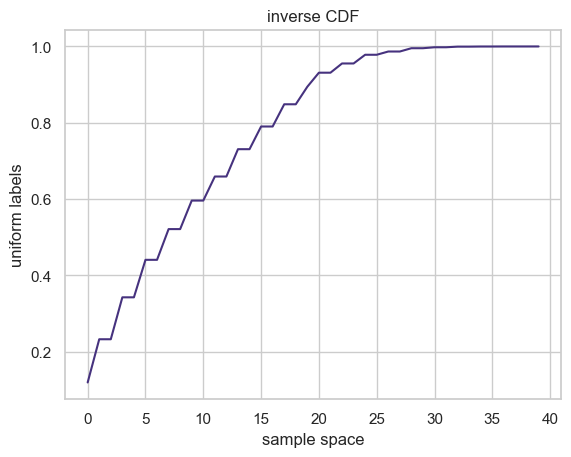

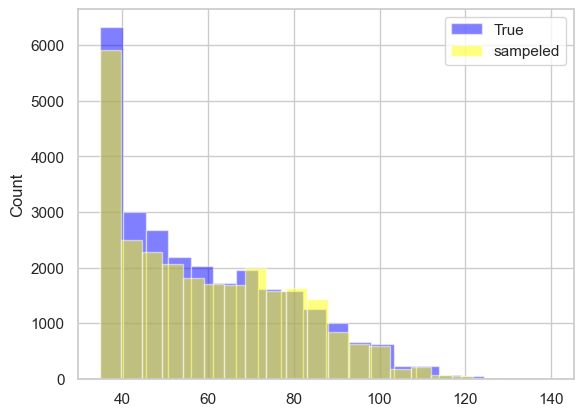

 Mean sample: 59.67109883909681, mean real data: 59.90517494854455
 Stdev sample: 19.5516871771351, stdev real data: 19.60516964820449


In [25]:
# Sample max_sust_wind_speed with inverse-transforme sampling 
# Analyse the quality 
import statistics as st

sampling_max_sust_wind_speed, CDF_max_sust_wind_speed = inverse_transform_sampling(max_sust_wind_speed)

plot_CDF(CDF_max_sust_wind_speed)
plot_true_sampling(max_sust_wind_speed, sampling_max_sust_wind_speed)

mean_sample_max_sust_wind_speed = st.mean(sampling_max_sust_wind_speed)
mean_real_max_sust_wind_speed = st.mean(max_sust_wind_speed)
stdev_sample_max_sust_wind_speed = st.stdev(sampling_max_sust_wind_speed)
stdev_real_max_sust_wind_speed = st.stdev(max_sust_wind_speed)

print(f' Mean sample: {mean_sample_max_sust_wind_speed}, mean real data: {mean_real_max_sust_wind_speed}')
print(f' Stdev sample: {stdev_sample_max_sust_wind_speed}, stdev real data: {stdev_real_max_sust_wind_speed}')

In [26]:
# Sample shortest_rad_of_30kt_winds_or_greater with inverse-transforme sampling 
# Analyse the quality 
import statistics as st

sampling_shortest_rad_of_30kt_winds_or_greater, CDF_shortest_rad_of_30kt_winds_or_greater = inverse_transform_sampling(shortest_rad_of_30kt_winds_or_greater)

plot_CDF(CDF_shortest_rad_of_30kt_winds_or_greater)
plot_true_sampling(shortest_rad_of_30kt_winds_or_greater, sampling_shortest_rad_of_30kt_winds_or_greater)

mean_sample_shortest_rad_of_30kt_winds_or_greater = st.mean(sampling_shortest_rad_of_30kt_winds_or_greater)
mean_real_shortest_rad_of_30kt_winds_or_greater = st.mean(shortest_rad_of_30kt_winds_or_greater)
stdev_sample_shortest_rad_of_30kt_winds_or_greater = st.stdev(sampling_shortest_rad_of_30kt_winds_or_greater)
stdev_real_shortest_rad_of_30kt_winds_or_greater = st.stdev(shortest_rad_of_30kt_winds_or_greater)

print(f' Mean sample: {mean_sample_shortest_rad_of_30kt_winds_or_greater}, mean real data: {mean_real_shortest_rad_of_30kt_winds_or_greater}')
print(f' Stdev sample: {stdev_sample_shortest_rad_of_30kt_winds_or_greater}, stdev real data: {stdev_real_shortest_rad_of_30kt_winds_or_greater}')

 Mean sample: 171.3206497345324, mean real data: 167.45387386062922
 Stdev sample: 82.47366228887694, stdev real data: 82.59549686819182


In [27]:
# Sample longest_rad_of_30kt_winds_or_greater with inverse-transforme sampling 
# Analyse the quality 
import statistics as st

sampling_longest_rad_of_30kt_winds_or_greater, CDF_slongest_rad_of_30kt_winds_or_greater = inverse_transform_sampling(longest_rad_of_30kt_winds_or_greater)

plot_CDF(CDF_slongest_rad_of_30kt_winds_or_greater)
plot_true_sampling(longest_rad_of_30kt_winds_or_greater, sampling_longest_rad_of_30kt_winds_or_greater)

mean_sample_longest_rad_of_30kt_winds_or_greater = st.mean(sampling_longest_rad_of_30kt_winds_or_greater)
mean_real_longest_rad_of_30kt_winds_or_greater = st.mean(longest_rad_of_30kt_winds_or_greater)
stdev_sample_longest_rad_of_30kt_winds_or_greater = st.stdev(sampling_longest_rad_of_30kt_winds_or_greater)
stdev_real_longest_rad_of_30kt_winds_or_greater = st.stdev(longest_rad_of_30kt_winds_or_greater)

print(f' Mean sample: {mean_sample_longest_rad_of_30kt_winds_or_greater}, mean real data: {mean_real_longest_rad_of_30kt_winds_or_greater}')
print(f' Stdev sample: {stdev_sample_longest_rad_of_30kt_winds_or_greater}, stdev real data: {stdev_real_longest_rad_of_30kt_winds_or_greater}')

 Mean sample: 212.43278072540764, mean real data: 210.85287415466038
 Stdev sample: 101.83998014598215, stdev real data: 101.82322453209083


Random sampling method

In [28]:
import seaborn as sns

max_sust_wind_speed = sample['max_sust_wind_speed'].dropna()

n = 1000

# perform random sampling
random_sampling_max_sust_wind_speed = np.random.choice(max_sust_wind_speed, size=n)

# compute mean and standard deviation of the sample
mean_sample = st.mean(random_sampling_max_sust_wind_speed)
mean_real = st.mean(max_sust_wind_speed)
stdev_sample = st.stdev(random_sampling_max_sust_wind_speed)
stdev_real = st.stdev(max_sust_wind_speed)

# print results
print(f'Random Sampling - max_sust_wind_speed:')
print(f' Mean sample: {mean_sample}, mean real data: {mean_real}')
print(f' Stdev sample: {stdev_sample}, stdev real data: {stdev_real}')


sns.kdeplot(data=random_sampling_max_sust_wind_speed, label='Sampled')
sns.kdeplot(data=max_sust_wind_speed, label='True')
plt.xlabel('max_sust_wind_speed')
plt.legend()
plt.show()



Random Sampling - max_sust_wind_speed:
 Mean sample: 60.11, mean real data: 59.90517494854455
 Stdev sample: 19.768122790965222, stdev real data: 19.60516964820449


In [29]:
import seaborn as sns

shortest_rad_of_30kt_winds_or_greater = sample['shortest_rad_of_30kt_winds_or_greater'].dropna()

n = 1000

# perform random sampling
random_shortest_rad_of_30kt_winds_or_greater = np.random.choice(shortest_rad_of_30kt_winds_or_greater, size=n)

# compute mean and standard deviation of the sample
mean_sample = st.mean(random_shortest_rad_of_30kt_winds_or_greater)
mean_real = st.mean(shortest_rad_of_30kt_winds_or_greater)
stdev_sample = st.stdev(random_shortest_rad_of_30kt_winds_or_greater)
stdev_real = st.stdev(shortest_rad_of_30kt_winds_or_greater)

# print results
print(f'Random Sampling - shortest_rad_of_30kt_winds_or_greater:')
print(f' Mean sample: {mean_sample}, mean real data: {mean_real}')
print(f' Stdev sample: {stdev_sample}, stdev real data: {stdev_real}')


sns.kdeplot(data=random_shortest_rad_of_30kt_winds_or_greater, label='Sampled')
sns.kdeplot(data=shortest_rad_of_30kt_winds_or_greater, label='True')
plt.xlabel('shortest_rad_of_30kt_winds_or_greater')
plt.legend()
plt.show()



Random Sampling - shortest_rad_of_30kt_winds_or_greater:
 Mean sample: 167.8, mean real data: 167.45387386062922
 Stdev sample: 82.47461465240114, stdev real data: 82.59549686819182


Random Sampling - longest_rad_of_30kt_winds_or_greater:
 Mean sample: 213.95, mean real data: 210.85287415466038
 Stdev sample: 102.18948179822712, stdev real data: 101.82322453209083


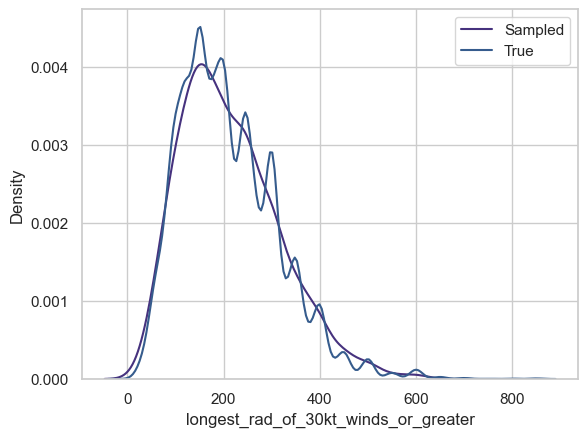

In [30]:
import seaborn as sns

longest_rad_of_30kt_winds_or_greater = sample['longest_rad_of_30kt_winds_or_greater'].dropna()

n = 1000

# perform random sampling
random_longest_rad_of_30kt_winds_or_greater = np.random.choice(longest_rad_of_30kt_winds_or_greater, size=n)

# compute mean and standard deviation of the sample
mean_sample = st.mean(random_longest_rad_of_30kt_winds_or_greater)
mean_real = st.mean(longest_rad_of_30kt_winds_or_greater)
stdev_sample = st.stdev(random_longest_rad_of_30kt_winds_or_greater)
stdev_real = st.stdev(longest_rad_of_30kt_winds_or_greater)

# print results
print(f'Random Sampling - longest_rad_of_30kt_winds_or_greater:')
print(f' Mean sample: {mean_sample}, mean real data: {mean_real}')
print(f' Stdev sample: {stdev_sample}, stdev real data: {stdev_real}')


sns.kdeplot(data=random_longest_rad_of_30kt_winds_or_greater, label='Sampled')
sns.kdeplot(data=longest_rad_of_30kt_winds_or_greater, label='True')
plt.xlabel('longest_rad_of_30kt_winds_or_greater')
plt.legend()
plt.show()



3. Estimation of relations between predictors and chosen target variables.

In [31]:
import seaborn as sns

# Select the variables of interest
variables = ['max_sust_wind_speed', 'shortest_rad_of_30kt_winds_or_greater', 'longest_rad_of_30kt_winds_or_greater', 'central_presure', 'grade']

# Create a correlation matrix
corr_matrix = sample[variables].corr()

# Create a heat map using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Print results using tabulate
table = []
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix)):
        target = corr_matrix.columns[i]
        predictor = corr_matrix.index[j]
        correlation = corr_matrix.iloc[j,i]
        table.append([target, predictor, correlation])

print(tabulate(table, headers=['Target', 'Predictor', 'Correlation'], tablefmt='orgtbl'))


| Target                                | Predictor                             |   Correlation |
|---------------------------------------+---------------------------------------+---------------|
| max_sust_wind_speed                   | max_sust_wind_speed                   |      1        |
| max_sust_wind_speed                   | shortest_rad_of_30kt_winds_or_greater |      0.523077 |
| max_sust_wind_speed                   | longest_rad_of_30kt_winds_or_greater  |      0.478257 |
| max_sust_wind_speed                   | central_presure                       |     -0.967643 |
| max_sust_wind_speed                   | grade                                 |      0.611559 |
| shortest_rad_of_30kt_winds_or_greater | max_sust_wind_speed                   |      0.523077 |
| shortest_rad_of_30kt_winds_or_greater | shortest_rad_of_30kt_winds_or_greater |      1        |
| shortest_rad_of_30kt_winds_or_greater | longest_rad_of_30kt_winds_or_greater  |      0.837022 |
| shortest_rad_of_30

In [32]:
import pandas as pd
from tabulate import tabulate

# Select target variable and predictor variables
target = "grade"
predictors = ["max_sust_wind_speed", "shortest_rad_of_30kt_winds_or_greater", "longest_rad_of_30kt_winds_or_greater"]

# Compute correlation matrix
corr_matrix = sample[[target]+predictors].corr()

# Format output
headers = ["Variable", "max_sust_wind_speed", "shortest_rad_of_30kt_winds_or_greater", "longest_rad_of_30kt_winds_or_greater"]
table = []
for variable in [target]+predictors:
    row = [variable] + [round(corr_matrix.loc[variable, p], 3) for p in predictors]
    table.append(row)

# Print correlation matrix using tabulate
print(tabulate(table, headers=headers, tablefmt="grid"))


+---------------------------------------+-----------------------+-----------------------------------------+----------------------------------------+
| Variable                              |   max_sust_wind_speed |   shortest_rad_of_30kt_winds_or_greater |   longest_rad_of_30kt_winds_or_greater |
+=======================================+=======================+=========================================+========================================+
| grade                                 |                 0.612 |                                   0.287 |                                  0.246 |
+---------------------------------------+-----------------------+-----------------------------------------+----------------------------------------+
| max_sust_wind_speed                   |                 1     |                                   0.523 |                                  0.478 |
+---------------------------------------+-----------------------+-----------------------------------------

Task 4. Build a Bayesian network for a chosen set of variables. Choose its structure on the basis of multivariate analysis and train distributions in nodes using the chosen algorithm. 

In [33]:
max_sust_wind_speed = sample['max_sust_wind_speed'].dropna()
shortest_rad_of_30kt_winds_or_greater = sample['shortest_rad_of_30kt_winds_or_greater'].dropna()
longest_rad_of_30kt_winds_or_greater = sample['longest_rad_of_30kt_winds_or_greater'].dropna()
grade = sample['grade'].dropna()
central_pressure = sample['central_presure'].dropna()

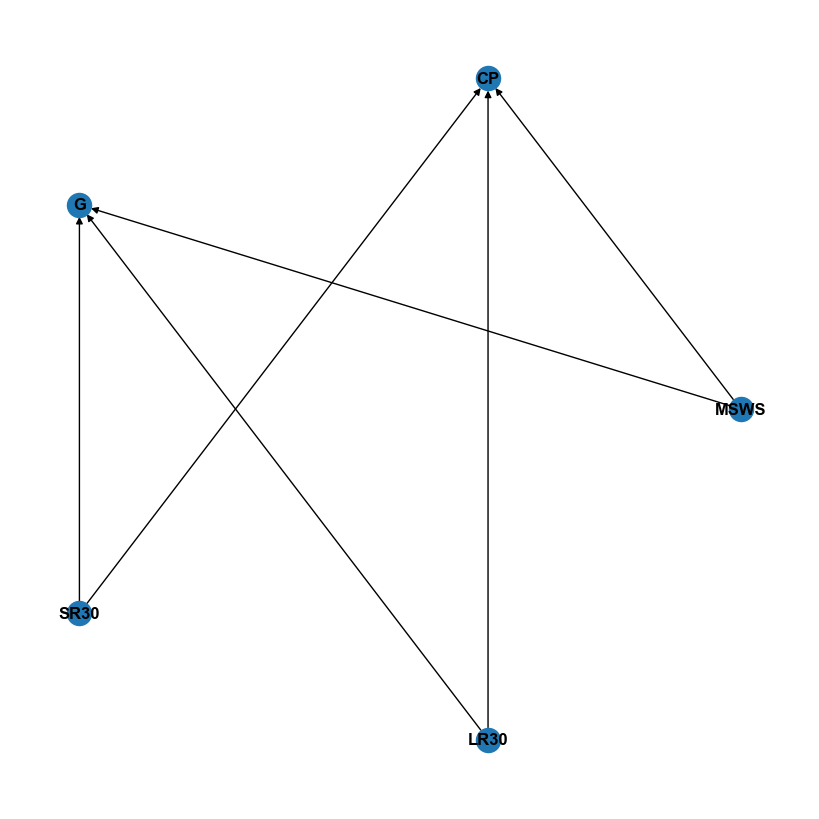

In [104]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

# create a dictionary to map original column names to new names
column_name_map = {'max_sust_wind_speed': 'MSWS', 'shortest_rad_of_30kt_winds_or_greater': 'SR30', 
                   'longest_rad_of_30kt_winds_or_greater': 'LR30', 'grade': 'G', 'central_presure': 'CP'}

# rename columns in the sample data using the dictionary
sample_renamed = sample.rename(columns=column_name_map)

# create variables with the updated column names
MSWS = sample_renamed['MSWS'].dropna()
SR30 = sample_renamed['SR30'].dropna()
LR30 = sample_renamed['LR30'].dropna()
G = sample_renamed['G'].dropna()
CP = sample_renamed['CP'].dropna()

# Initialize empty Bayesian model object
model = BayesianModel()

# Define the nodes and edges of the network
model.add_nodes_from(['CP', 'G', 'MSWS', 'SR30', 'LR30'])
model.add_edges_from([('MSWS', 'CP'), ('SR30', 'CP'), ('LR30', 'CP'),
                      ('MSWS', 'G'), ('SR30', 'G'), ('LR30', 'G')])

import networkx as nx

network = nx.DiGraph()
network.add_edges_from(model.edges())
pos = nx.layout.circular_layout(network)
plt.figure(figsize=(8, 8))
nx.draw(network, pos, with_labels=True, font_weight="bold")

5. Quality analysis.  Build a Bayesian network for the same set of variables but using 2 chosen algorithms for structural learning.

In [105]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Instantiate the Maximum Likelihood Estimator
mle = MaximumLikelihoodEstimator(model, sample_renamed)

# Fit the estimator to learn the parameters
cpd_CP = mle.estimate_cpd('CP')
cpd_G = mle.estimate_cpd('G')
cpd_MSWS = mle.estimate_cpd('MSWS')
cpd_SR30 = mle.estimate_cpd('SR30')
cpd_LR30 = mle.estimate_cpd('LR30')


In [209]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch


# create a dictionary to map original column names to new names
column_name_map = {'max_sust_wind_speed': 'MSWS', 'shortest_rad_of_30kt_winds_or_greater': 'SR30', 
                   'longest_rad_of_30kt_winds_or_greater': 'LR30', 'grade': 'G', 'central_presure': 'CP'}

# rename columns in the sample data using the dictionary
sample_renamed = sample.rename(columns=column_name_map)

# create variables with the updated column names
MSWS = sample_renamed['MSWS'].dropna()
SR30 = sample_renamed['SR30'].dropna()
LR30 = sample_renamed['LR30'].dropna()
G = sample_renamed['G'].dropna()
CP = sample_renamed['CP'].dropna()

# Create a Bayesian model object
model = BayesianModel()

# Define the nodes and edges of the network
model.add_nodes_from(['CP', 'G', 'MSWS', 'SR30', 'LR30'])
model.add_edges_from([('MSWS', 'CP'), ('SR30', 'CP'), ('LR30', 'CP'),
                      ('MSWS', 'G'), ('SR30', 'G'), ('LR30', 'G')])

# Create an instance of the TreeSearch estimator
estimator = TreeSearch(sample_renamed)

# Use the estimator to learn the structure of the network
model = estimator.estimate()
print(model)

import networkx as nx

network = nx.DiGraph()
network.add_edges_from(model.edges())
pos = nx.layout.circular_layout(network)
plt.figure(figsize=(8, 8))
nx.draw(network, pos, with_labels=True, font_weight="bold")

Building tree: 100%|██████████| 91/91.0 [00:00<00:00, 354.75it/s]


DAG with 14 nodes and 13 edges


  0%|          | 9/1000000 [00:15<475:26:02,  1.71s/it] 


[('G', 'SR30'), ('CP', 'MSWS'), ('MSWS', 'G'), ('MSWS', 'shortest_rad_of_50kt_winds_or_greater'), ('dir_of_longeast_rad_of_50kt_or_greater', 'dir_of_longeast_rad_of_30kt_winds_or_greater'), ('longeast_rad_of_50kt_winds_or_greater', 'dir_of_longeast_rad_of_50kt_or_greater'), ('shortest_rad_of_50kt_winds_or_greater', 'longeast_rad_of_50kt_winds_or_greater'), ('dir_of_longeast_rad_of_30kt_winds_or_greater', 'month'), ('SR30', 'LR30')]


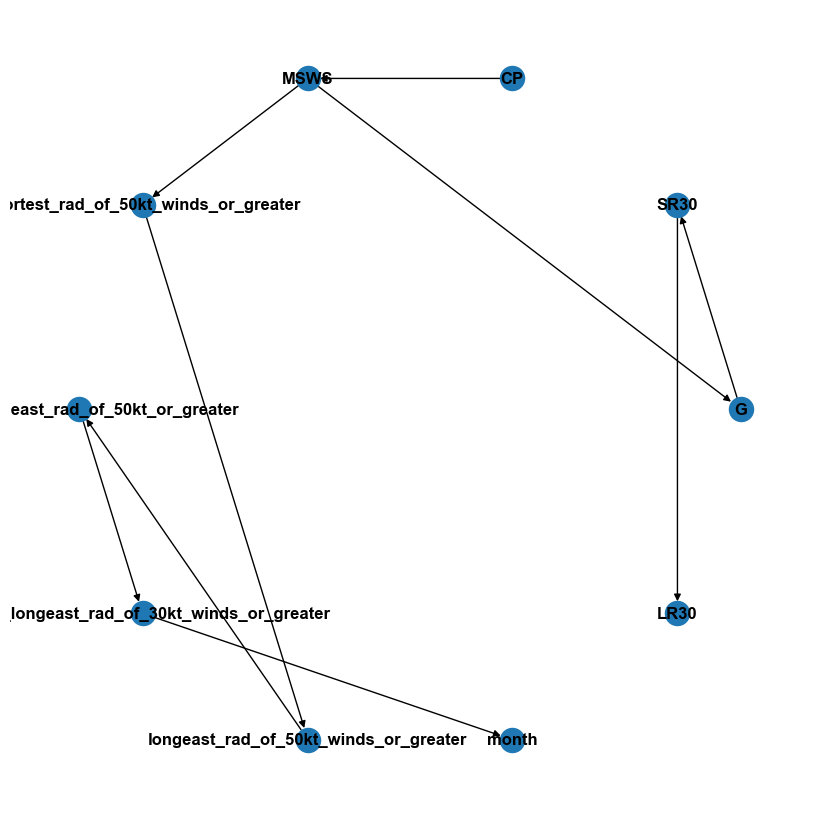

In [120]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

# create a dictionary to map original column names to new names
column_name_map = {'max_sust_wind_speed': 'MSWS', 'shortest_rad_of_30kt_winds_or_greater': 'SR30', 
                   'longest_rad_of_30kt_winds_or_greater': 'LR30', 'grade': 'G', 'central_presure': 'CP'}

# rename columns in the sample data using the dictionary
sample_renamed = sample.rename(columns=column_name_map)

# create variables with the updated column names
MSWS = sample_renamed['MSWS'].dropna()
SR30 = sample_renamed['SR30'].dropna()
LR30 = sample_renamed['LR30'].dropna()
G = sample_renamed['G'].dropna()
CP = sample_renamed['CP'].dropna()

# Define the nodes and edges of the network
model.add_nodes_from(['CP', 'G', 'MSWS', 'SR30', 'LR30'])
model.add_edges_from([('MSWS', 'CP'), ('SR30', 'CP'), ('LR30', 'CP'),
                      ('MSWS', 'G'), ('SR30', 'G'), ('LR30', 'G')])

# create an instance of HillClimbSearch algorithm
estimator = HillClimbSearch(sample_renamed)

# learn the structure of the network using the estimator
model = estimator.estimate(scoring_method=BicScore(sample_renamed))

# print the edges of the learned network
print(model.edges())

import networkx as nx

network = nx.DiGraph()
network.add_edges_from(model.edges())
pos = nx.layout.circular_layout(network)
plt.figure(figsize=(8, 8))
nx.draw(network, pos, with_labels=True, font_weight="bold")



6. Quality